__собираем статистики по объявлениям о продаже квартир__

_Evgeny S. Borisov <parser@mechanoid.su>_

In [1]:
# !pip install plotly ipywidgets plotly-geo

In [2]:
# import re
# import numpy as np
# from tqdm.notebook import tqdm
import pandas as pd
import geopandas as gpd
# import plotly
# import contextily as ctx
# from shapely.geometry import Polygon

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
# tqdm.pandas()
# pd.options.plotting.backend = 'plotly'

In [4]:
# !ls -1 data

In [5]:
# import shapely
# shapely.__version__
# '1.8.4'

In [6]:
# !pip install greppo==0.0.32
# !pip install shapely==1.8.2

## считываем данные

In [7]:
data_file = 'data/data_flat.pkl'

In [8]:
cols = ['title','adr','latitude','longitude','priceM','ts']
df = pd.read_pickle(data_file)
df['dt'] = pd.to_datetime( df['ts'].dt.date )
print(len(df))
df.sample(3)[cols]

41606


,title,adr,latitude,longitude,priceM,ts
27115,"2-комн. кв., 43 м², 4/5 этаж","Севастополь, район Ленинский, Острякова, улица Хрусталева, 7",44.58504,33.516341,6.30,2022-09-15 10:30:49.198554
36440,"2-комн. кв., 55,3 м², 2/5 этаж","Севастополь,",44.556972,33.526402,7.95,2022-10-14 15:53:32.427946
3363,"1-к. квартира, 39,2 м², 8/9 эт.","Севастополь, проспект Победы, 21А/3",44.58,33.56,6.89,2022-08-26 17:29:00.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41606 entries, 0 to 41605
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          41606 non-null  object        
 1   price          41606 non-null  int64         
 2   adr_orig       41606 non-null  object        
 3   description    41606 non-null  object        
 4   obj_name       41606 non-null  object        
 5   ts             41606 non-null  datetime64[ns]
 6   avito_page     22288 non-null  float64       
 7   place          41606 non-null  object        
 8   nrooms         41606 non-null  int64         
 9   floor          41606 non-null  int64         
 10  nfloors        41606 non-null  int64         
 11  area           41606 non-null  float64       
 12  is_studio      41606 non-null  bool          
 13  is_apartment   41606 non-null  bool          
 14  is_part        41606 non-null  bool          
 15  is_auction     4160

In [10]:
# берём объявления с геометкой
print(len(df))
df = df[ (~df['latitude'].isnull()) ].reset_index(drop=True)
print(len(df))

41606
41606


### ограничиваем тип объекта 

In [11]:
print(len(df))
# выкидываем "ущербные" варианты 
df = df.query('~(is_studio|is_apartment|is_part|is_auction|is_openspace|is_SNT|is_roof)&(nrooms>0)&(nrooms<4)')
print(len(df))

41606
35824


In [12]:
gdf = gpd.GeoDataFrame( df, geometry = gpd.points_from_xy( df['longitude'], df['latitude']), crs='epsg:4326', )
gdf.sample(3)[['title','adr','latitude','longitude','priceM']]

,title,adr,latitude,longitude,priceM
37041,"1-комн. кв., 39,7 м², 3/3 этаж","Севастополь, район Гагаринский, Казачья Бухта мкр",44.567608,33.419395,4.62
27285,"3-комн. кв., 72 м², 3/5 этаж","Севастополь,Республика Крым, Бахчисарайский район, Красномакское с/пос, село Холмовка, улица 70 лет Октября, 1",44.659487,33.756101,4.70
41322,"1-комн. кв., 24 м², 2/8 этаж","Севастополь, район Ленинский, улица Токарева, 18Г",44.578665,33.506028,5.95


In [13]:
df.sample(10)[['title','adr','url']].to_dict('records') 

[{'title': '3-комн. кв., 67,7 м², 1/5 этаж',
  'adr': 'Севастополь, район Ленинский, Острякова, улица Боцманская, 7',
  'url': 'https://sevastopol.cian.ru/sale/flat/273223776/'},
 {'title': '2-комн. кв., 63,6 м², 2/8 этаж',
  'adr': 'Севастополь, район Ленинский, Матюшенко, улица Балтийская, 14',
  'url': 'https://sevastopol.cian.ru/sale/flat/272065681/'},
 {'title': '2-к. квартира, 40,7\xa0м², 4/4\xa0эт.',
  'adr': 'Севастополь, улица Кулакова, 41',
  'url': 'https://avito.ru/2456374621'},
 {'title': '1-к. квартира, 46\xa0м², 2/3\xa0эт.',
  'adr': 'Севастополь,Каспийская улица , 77',
  'url': 'https://avito.ru/2415887978'},
 {'title': '3-комн. кв., 60 м², 4/5 этаж',
  'adr': 'Севастополь,',
  'url': 'https://sevastopol.cian.ru/sale/flat/278532880/'},
 {'title': '3-комн. кв., 110 м², 10/11 этаж',
  'adr': 'Севастополь, район Гагаринский, Стрелецкая бухта, улица Степаняна, 4/2',
  'url': 'https://sevastopol.cian.ru/sale/flat/273124356/'},
 {'title': '1-к. квартира, 38\xa0м², 10/11\xa0эт

In [14]:
# gdf.sample(3)[['title','adr','latitude','longitude','priceM']].to_json()

In [15]:
# gdf.to_file(data_file.replace('.pkl','.shp'))

In [16]:
# gdf.to_file(data_file.replace('.pkl','.geojson'), driver='GeoJSON')

In [17]:
# gdf.to_file(data_file.replace('.pkl','.gpkg'), layer='points', driver="GPKG")

In [18]:
del df

In [19]:
gdf[['title','adr','priceM','geometry']].sample(100).explore()

## общая статистика изменение цены

In [20]:
stat = (
    gdf.query('priceM>1.')
    .groupby(['nrooms','dt'])
    ['priceM']
    .describe(percentiles=[.01,.1,.25,.5,.75,.9])
)

stat

count  mean  std  min   1%  10%  25%   50%   75%   90%  \
nrooms dt                                                                    
1      2022-08-26 1203.00  6.26 1.91 1.59 2.31 4.07 5.00  6.00  7.30  8.50   
       2022-08-29 1191.00  6.25 1.90 1.75 2.73 4.11 5.00  6.00  7.21  8.50   
       2022-08-31 1180.00  6.34 1.92 1.30 2.72 4.20 5.09  6.00  7.43  8.76   
       2022-09-01 1159.00  6.32 1.89 1.30 2.78 4.15 5.10  6.00  7.40  8.51   
       2022-09-02  365.00  6.31 2.10 3.65 3.65 4.00 4.85  5.81  7.21  9.35   
...                   ...   ...  ...  ...  ...  ...  ...   ...   ...   ...   
3      2022-10-08  329.00 10.84 5.60 5.10 5.83 7.20 8.25  9.80 10.90 15.00   
       2022-10-14  314.00 11.02 7.73 5.00 5.54 7.00 8.00  9.05 10.80 15.00   
       2022-11-01  385.00 11.29 5.04 4.90 5.75 7.10 8.30 10.21 12.50 16.50   
       2022-11-04  370.00 11.24 4.85 4.90 5.71 7.19 8.43 10.21 12.22 16.32   
       2022-11-07  364.00 11.55 5.19 4.60 5.80 7.27 8.49 10.33 12.75 17.00   

                     max  
nrooms dt                 
1      2022-08-26  18.50  
       2022-08-29  18.50  
       2022-08-31  18.50  
       2022-09-01  18.50  
       2022-09-02  14.90  
...                  ...  
3      2022-10-08  56.52  
       2022-10-14 100.00  
       2022-11-01  45.00  
       2022-11-04  45.00  
       2022-11-07  45.00  

[63 rows x 11 columns]

In [21]:
( # количество предложений
    gdf.query('priceM>1.')
    .groupby(['nrooms'])
    [['title']].count()
).T

nrooms,1,2,3
title,17231,11496,7096


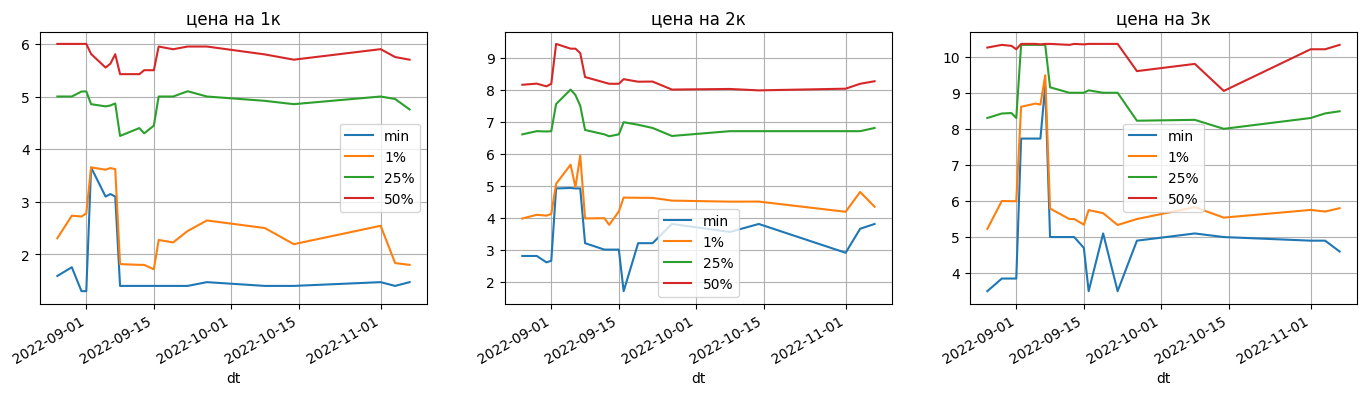

In [22]:
import matplotlib.pyplot as plt

sizes = [1,2,3,]

#fig, ax = plt.subplots(1,len(sizes),figsize=(17,4), sharey=True )
fig, ax = plt.subplots(1,len(sizes),figsize=(17,4), sharey=False )
for i,k in enumerate(sizes): 
    stat.loc[k,['min','1%','25%','50%']].plot(title=f'цена на {k}к', grid=True,ax=ax[i] )    

### район поиска

In [23]:
from shapely.geometry import MultiPoint

frame_all = gpd.GeoDataFrame([{ # все предложения
            'place':'sevastopol', 
            'geometry':MultiPoint( gdf['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

In [24]:
frame_all.explore()

In [25]:
frame_all.to_file('data/frame_all.geojson', driver='GeoJSON')

### гексагональная сетка

In [26]:
import h3
from shapely.geometry import Polygon

def cover_grid_hexagonal(gmtr,cell_size=6,crs='EPSG:4326'):
    polygonise = lambda hex_id: Polygon( h3.h3_to_geo_boundary( hex_id, geo_json=True)  )
    hexs = list(h3.polyfill( gmtr.__geo_interface__, cell_size, geo_json_conformant = True ))
    return gpd.GeoDataFrame({ 'hex_id': hexs,  'geometry': list(map(polygonise, hexs)), },crs=crs,)

In [27]:
grid = cover_grid_hexagonal( frame_all.geometry.values[0],cell_size=6 )
print(len(grid))
grid.sample(2)

24


,hex_id,geometry
7,862d28877ffffff,"POLYGON ((33.64275 44.56559, 33.62132 44.53616, 33.64817 44.50734, 33.69643 44.50794, 33.71787 44.53737, 33.69105 44.56620, 33.64275 44.56559))"
22,862d2d59fffffff,"POLYGON ((33.48121 44.73827, 33.45978 44.70885, 33.48675 44.68010, 33.53515 44.68076, 33.55659 44.71016, 33.52964 44.73892, 33.48121 44.73827))"


In [28]:
# grid.explore()

### медиана актуальной цены

In [29]:
ts = '2022-08-01' # ограничиваем дату

# новые предложения
gdf_ = gdf[ (gdf['dt']>ts)  ] # & (gdf['priceM']<15.)

grid_values = ( 
    grid
    .sjoin(gdf_, how='inner',)
    .groupby(['hex_id'])
    ['priceM']
    .median()
    .reset_index()
)

grid.merge(grid_values,on='hex_id').explore('priceM',cmap='rainbow') #'area_name', legend=True)

## ограничиваем по район поиска

In [30]:
# загружаем области поиска
frames_path = 'data/frames/'
frames_index = pd.read_csv(f'{frames_path}/_index.tsv',sep='\t')

swap_coo = lambda coo : [ (c[1],c[0]) for c in coo ]
df2poly = lambda df : Polygon(swap_coo(df.values))

frames = gpd.GeoDataFrame([ 
    { 'area_name':nm, 'geometry': df2poly( pd.read_csv(f'{frames_path}/{f}',header=None) ) } 
    for nm,f in frames_index.values
],crs='epsg:4326',)

frames

,area_name,geometry
0,"Севастополь, район Острякова","POLYGON ((33.51618 44.58832, 33.52597 44.58817, 33.53399 44.57315, 33.54248 44.55177, 33.52583 44.55023, 33.51174 44.57861, 33.51253 44.58565, 33.51253 44.58565, 33.51618 44.58832))"
1,"Севастополь, парк 60-летия СССР","POLYGON ((33.51805 44.58404, 33.51458 44.58408, 33.51263 44.58031, 33.51435 44.57460, 33.52004 44.57520, 33.51805 44.58404))"
2,"Севастополь, Хрусталёва/Хрюкина","POLYGON ((33.52003 44.57511, 33.52527 44.56364, 33.52116 44.56136, 33.51942 44.56406, 33.51951 44.56384, 33.51874 44.56882, 33.51426 44.57444, 33.52003 44.57511))"
3,"Севастополь, Геловани/Коломийца","POLYGON ((33.52139 44.57296, 33.53034 44.57518, 33.53318 44.57413, 33.53369 44.57139, 33.53244 44.56878, 33.53123 44.56774, 33.52440 44.56640, 33.52139 44.57296))"
4,"Севастополь, Музыки/Бирюзова","POLYGON ((33.52027 44.57528, 33.51724 44.58719, 33.52038 44.58724, 33.52554 44.58091, 33.52561 44.57790, 33.52027 44.57528))"
5,"Севастополь, кр.горка","POLYGON ((33.53426 44.59526, 33.54470 44.58945, 33.54804 44.58596, 33.55346 44.58519, 33.55707 44.57912, 33.56296 44.57711, 33.54048 44.56941, 33.53004 44.59308, 33.53426 44.59526))"
6,"Севастополь, Малахов курган","POLYGON ((33.54313 44.60612, 33.55331 44.61155, 33.55676 44.60803, 33.55772 44.60255, 33.55385 44.60019, 33.54414 44.60247, 33.54313 44.60612))"


In [31]:
frames.explore('area_name', legend=True)

In [32]:
frames.to_file('data/frames.geojson', driver='GeoJSON')

In [33]:
area_name=[
#'Севастополь, парк 60-летия СССР',
#'Севастополь, Хрусталёва/Хрюкина',
'Севастополь, район Острякова',
# 'Севастополь, Малахов курган',
]

# выбираем область
frame_ = frames[frames['area_name'].isin(area_name)]

# фильтруем данные по области
print(len(gdf))
gdf_ = gdf.sjoin( frame_, how='inner', predicate='within') 
print(len(gdf_))

35824
3040


In [34]:
frames.iloc[[0]]

,area_name,geometry
0,"Севастополь, район Острякова","POLYGON ((33.51618 44.58832, 33.52597 44.58817, 33.53399 44.57315, 33.54248 44.55177, 33.52583 44.55023, 33.51174 44.57861, 33.51253 44.58565, 33.51253 44.58565, 33.51618 44.58832))"


In [35]:
# новые (актуальные) предложения
# gdf_[gdf_['ts']>ts][['title','priceM','adr','geometry']].explore( legend=False)
gdf_[['title','priceM','adr','geometry']].explore( legend=False)

### изменение цены

In [36]:
( # количество предложений
    gdf_.query('priceM>1.')
    .groupby(['nrooms'])
    [['title']].count()
).T

nrooms,1,2,3
title,994,1198,848


In [37]:
stat = gdf_.groupby(['nrooms','dt',])['priceM'].describe(percentiles=[.01,.1,.25,.5,.75,.9])
stat

count  mean  std   min    1%   10%   25%   50%   75%   90%  \
nrooms dt                                                                       
1      2022-08-26  87.00  5.70 1.56  1.85  1.98  4.10  4.77  5.50  6.75  7.57   
       2022-08-29  95.00  5.70 1.58  1.85  1.99  4.10  4.82  5.60  6.68  7.58   
       2022-08-31  97.00  5.64 1.45  1.85  1.98  4.10  4.90  5.60  6.50  7.50   
       2022-09-01  95.00  5.65 1.43  1.85  1.98  4.10  4.90  5.60  6.68  7.53   
       2022-09-08  54.00  5.03 1.52  1.85  2.03  3.06  4.12  4.93  5.90  6.98   
       2022-09-12  53.00  4.94 1.42  1.85  2.03  3.04  4.25  4.90  5.70  6.61   
       2022-09-13  42.00  4.82 1.52  1.85  1.99  2.87  4.12  4.55  5.65  6.65   
       2022-09-15  53.00  4.97 1.44  1.85  2.03  3.04  4.25  4.85  5.60  6.78   
       2022-09-16  38.00  5.54 1.34  1.85  2.61  4.17  4.81  5.35  6.44  7.10   
       2022-09-19  35.00  5.65 1.31  1.85  2.55  4.60  4.90  5.40  6.38  7.02   
       2022-09-22  46.00  5.70 1.32  1.85  2.37  4.70  5.10  5.45  6.35  7.42   
       2022-09-26  49.00  5.74 1.34  1.60  2.70  4.56  4.90  5.50  6.50  7.18   
       2022-10-08  67.00  5.47 1.32  1.85  2.77  4.70  4.76  4.90  6.05  6.92   
       2022-10-14  66.00  5.84 1.51  1.85  2.76  4.50  4.75  5.35  6.70  8.00   
       2022-11-01  42.00  5.80 1.26  3.99  4.14  4.60  4.90  5.45  6.20  7.95   
       2022-11-04  38.00  5.78 1.48  1.85  2.37  4.56  5.15  5.50  6.42  8.05   
       2022-11-07  37.00  5.71 1.64  1.75  1.79  4.32  4.65  5.50  6.50  7.70   
2      2022-08-26 125.00  7.97 2.12  5.40  5.42  6.24  6.50  7.30  8.50 10.82   
       2022-08-29 125.00  8.05 2.14  4.90  5.32  6.04  6.50  7.49  9.00 10.99   
       2022-08-31 127.00  7.89 2.08  4.90  5.19  5.98  6.50  7.20  8.65 10.78   
       2022-09-01 132.00  7.83 2.05  4.90  5.23  5.81  6.50  7.20  8.50 10.52   
       2022-09-08  48.00  7.93 2.35  4.90  5.18  6.09  6.40  6.95  8.75 11.12   
       2022-09-12  47.00  7.76 2.41  4.90  5.02  5.83  6.30  6.90  8.60 11.16   
       2022-09-13  46.00  7.84 2.40  5.15  5.31  5.92  6.30  6.90  8.65 11.20   
       2022-09-15  49.00  7.75 2.36  4.90  5.02  5.78  6.30  6.90  8.50 11.08   
       2022-09-16  47.00  7.85 2.17  4.90  5.13  6.00  6.30  7.05  8.50 11.29   
       2022-09-19  45.00  7.56 2.12  4.90  5.01  5.62  6.30  6.99  8.10 11.11   
       2022-09-22  57.00  7.98 2.98  3.80  4.58  5.68  6.20  7.00  8.49 12.50   
       2022-09-26  58.00  7.13 1.48  3.80  4.66  5.79  6.20  6.85  7.70  8.89   
       2022-10-08  60.00  7.03 1.54  3.55  4.23  5.36  6.20  6.90  7.50  8.67   
       2022-10-14  66.00  7.35 1.50  4.70  4.90  5.80  6.45  7.12  7.94  8.65   
       2022-11-01  54.00  7.73 2.11  4.60  4.60  5.73  6.33  7.12  8.50 11.40   
       2022-11-04  58.00  7.58 2.19  3.65  4.31  5.50  6.30  7.00  8.42 11.08   
       2022-11-07  54.00  7.78 2.27  4.80  5.17  5.80  6.49  7.00  8.43 11.12   
3      2022-08-26  90.00  9.68 2.39  6.90  6.90  7.30  7.83  9.00 10.78 13.50   
       2022-08-29  85.00  9.64 2.29  6.90  6.90  7.24  7.80  9.00 10.80 13.30   
       2022-08-31  86.00  9.67 2.29  6.90  6.90  7.40  7.84  9.15 11.00 13.25   
       2022-09-01  85.00  9.56 2.30  6.90  6.98  7.38  7.80  9.00 10.70 13.18   
       2022-09-02   2.00 12.50 1.41 11.50 11.52 11.70 12.00 12.50 13.00 13.30   
       2022-09-05   3.00 11.70 1.56 10.80 10.80 10.80 10.80 10.80 12.15 12.96   
       2022-09-06   2.00 12.15 1.91 10.80 10.83 11.07 11.48 12.15 12.82 13.23   
       2022-09-07   2.00 12.15 1.91 10.80 10.83 11.07 11.48 12.15 12.82 13.23   
       2022-09-08  27.00 10.05 2.01  7.30  7.40  8.10  8.75  9.45 10.50 12.60   
       2022-09-12  33.00  9.53 2.11  6.90  6.90  7.30  7.95  9.10 10.50 11.90   
       2022-09-13  35.00  9.87 2.34  6.90  6.90  7.38  8.35  9.45 10.50 12.90   
       2022-09-15  32.00 10.00 2.40  6.90  6.90  7.32  8.38  9.70 10.55 13.35   
       2022-09-16  38.00 10.36 2.61  6.90  6.93  7.44  8.33 10.05 11.50 13.95   
       2022-09-19  33.00 10.47 2.73  6.90  6.93  7

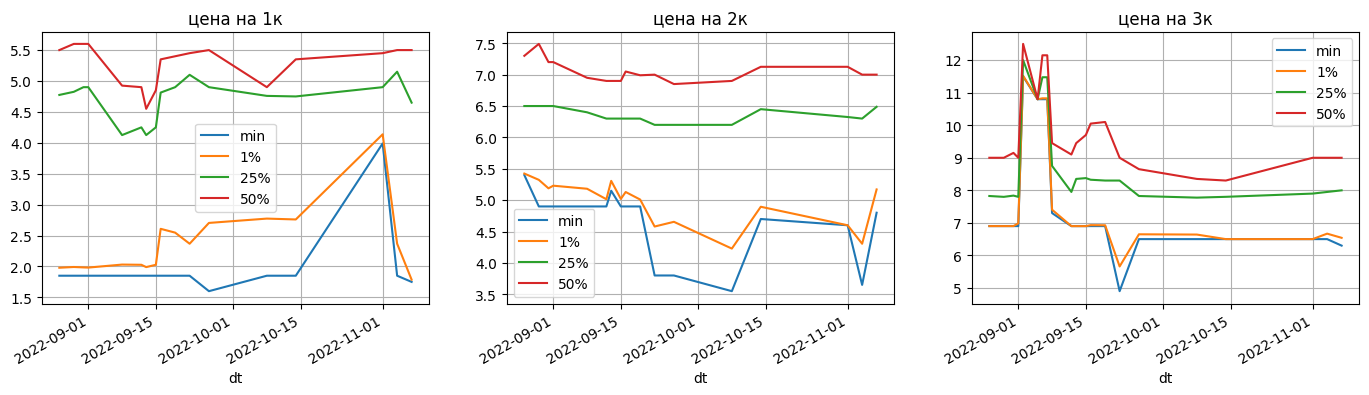

In [38]:
import matplotlib.pyplot as plt

sizes = [1,2,3,]

# fig, ax = plt.subplots(1,len(sizes),figsize=(17,4), sharey=True )
fig, ax = plt.subplots(1,len(sizes),figsize=(17,4), sharey=False )
for i,k in enumerate(sizes): 
    stat.loc[k,['min','1%','25%','50%']].plot(title=f'цена на {k}к', grid=True,ax=ax[i] )    

### гексагональная сетка

In [39]:
grid = cover_grid_hexagonal( frame_.geometry.values[0], cell_size=9 )
print(len(grid))
grid.sample(2)

54


,hex_id,geometry
6,892d2894213ffff,"POLYGON ((33.52497 44.57415, 33.52465 44.57236, 33.52673 44.57120, 33.52914 44.57183, 33.52947 44.57362, 33.52738 44.57478, 33.52497 44.57415))"
19,892d289552fffff,"POLYGON ((33.52479 44.56046, 33.52446 44.55867, 33.52655 44.55751, 33.52895 44.55814, 33.52928 44.55993, 33.52719 44.56109, 33.52479 44.56046))"


### медиана актуальной цены

In [40]:
grid_values = (
    grid
    .sjoin( gdf[ gdf['dt']>ts ], how='inner',)
    .groupby(['hex_id'])
    ['priceM']
    .median()
    .reset_index()
)

grid.merge(grid_values,on='hex_id').explore('priceM',cmap='rainbow') #'area_name', legend=True)